In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

In [2]:
def get_data():
    #for training data
    train_data_path = 'C:/Users/ACER/Documents/Ashiq/Final Project/pr1/train.csv'
    train_d = pd.read_csv(train_data_path)
    train_d
    #for testing data
    test_data_path = 'C:/Users/ACER/Documents/Ashiq/Final Project/pr1/test.csv'
    test_d = pd.read_csv(test_data_path)

    return train_d, test_d

In [3]:
def get_combine_data():
    # Combine the train and test data
    train_d, test_d = get_data()

    # Here getting the target
    target = train_d['subscribed']
    train_d.drop(['subscribed'], inplace=True, axis=1)

    # Here getting the combined data
    complete_data = pd.concat([train_d, test_d], axis=0)
    complete_data.reset_index(drop=True, inplace=True)
    complete_data.drop(['ID'], inplace=True, axis=1)

    # Combine the complete_data and target to align and drop missing target values
    combined_data = pd.concat([complete_data, target], axis=1)
    cleaned_data = combined_data.dropna(subset=['subscribed'])

    # Separate the cleaned data back into complete_data and target
    complete_data_cleaned = cleaned_data.drop(columns=['subscribed'])
    target_cleaned = cleaned_data['subscribed']

    return complete_data_cleaned, target_cleaned


Loading And Combining The Train and Test Data

In [4]:
train_data, test_data = get_data()

complete_data_cleaned, target = get_combine_data()

In [5]:
complete_data_cleaned.shape


(31647, 16)

In [6]:
target.shape

(31647,)

In [7]:
complete_data_cleaned.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
target.describe(include = 'all')

count     31647
unique        2
top          no
freq      27932
Name: subscribed, dtype: object

In [9]:
complete_data_cleaned.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,poutcome
count,31647,31647,31647,31647,31647,31647,31647,31647,31647
unique,12,3,4,2,2,2,3,12,4
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,6842,19095,16224,31062,17584,26516,20423,9669,25929


In [10]:
complete_data_cleaned.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown


In [11]:
target.head()

0     no
1     no
2     no
3    yes
4     no
Name: subscribed, dtype: object

In [12]:
complete_data_cleaned.shape

(31647, 16)

In [13]:
complete_data_cleaned.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [14]:
target.value_counts()

subscribed
no     27932
yes     3715
Name: count, dtype: int64

Here checking the duplicates values after combining and cleaned data

In [15]:
duplicates = complete_data_cleaned.duplicated(subset=complete_data_cleaned.columns, keep=False)

# Filter the DataFrame to show only the duplicate rows
duplicate_rows = complete_data_cleaned[duplicates]

# Display the duplicate rows (if any)
print(duplicate_rows)


Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome]
Index: []


In [16]:
duplicates_target = target.duplicated(keep=False)

# Filter the target DataFrame to show only the duplicate rows
duplicate_target_rows = target[duplicates_target]

# Display the duplicate rows (if any)
print(duplicate_target_rows)


0         no
1         no
2         no
3        yes
4         no
        ... 
31642     no
31643    yes
31644     no
31645     no
31646    yes
Name: subscribed, Length: 31647, dtype: object


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>, <Axes: >, <Axes: >]],
      dtype=object)

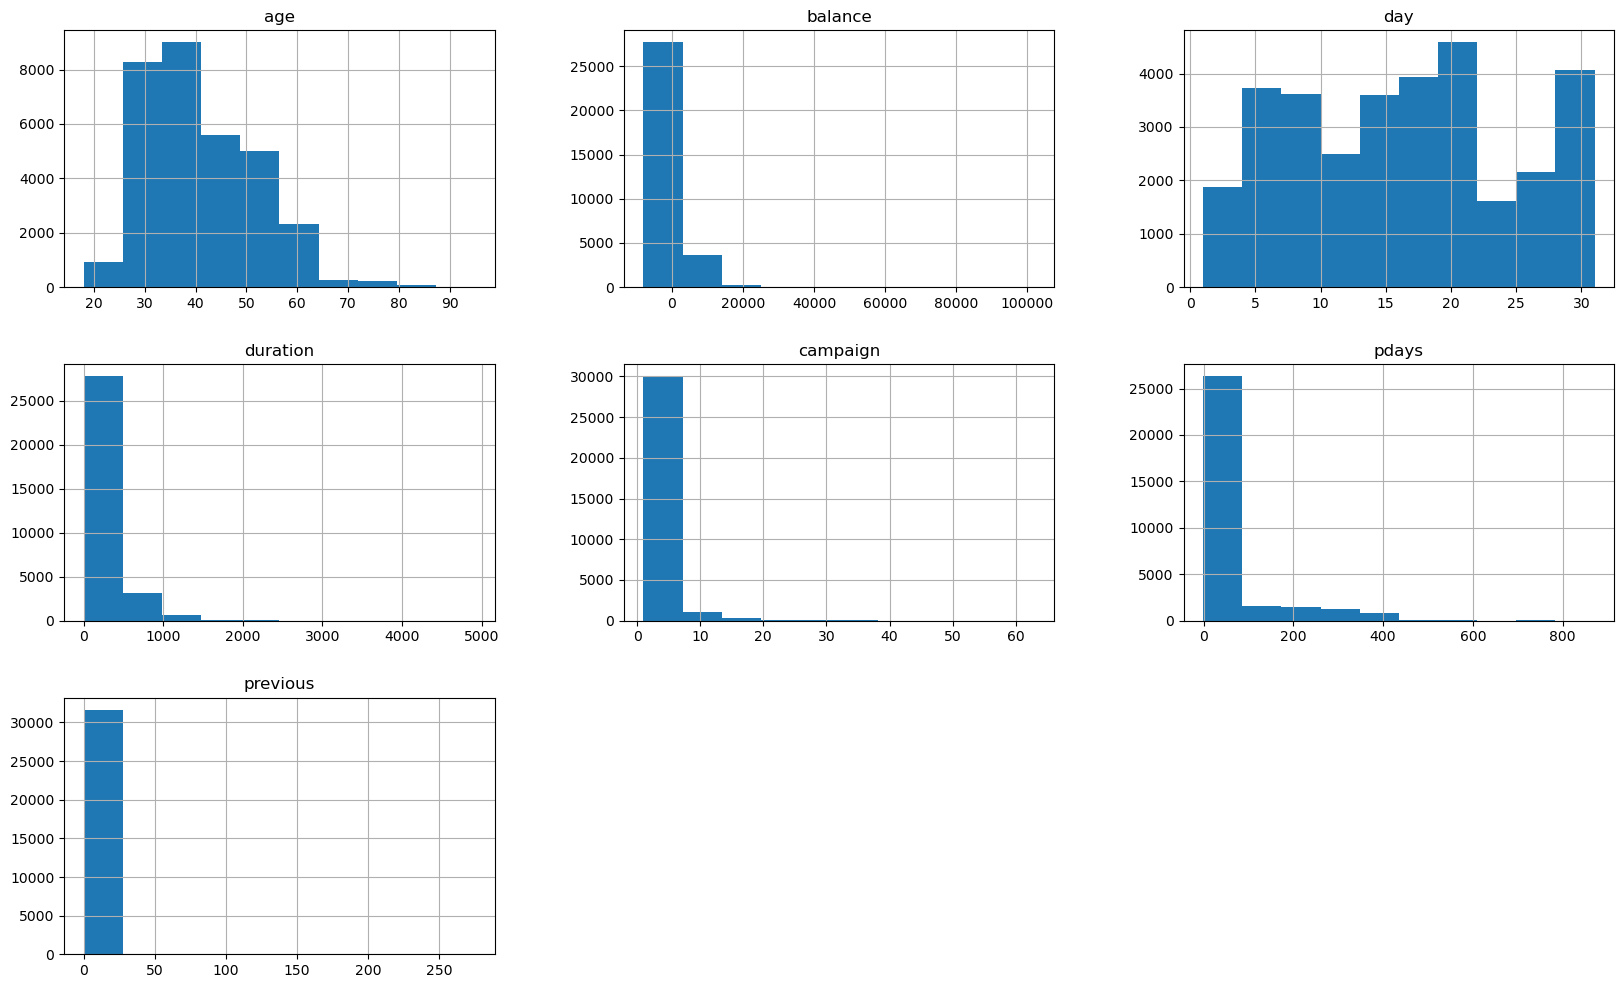

In [17]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 20,12
complete_data_cleaned.hist()

In [18]:
complete_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31647 entries, 0 to 31646
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        31647 non-null  int64 
 1   job        31647 non-null  object
 2   marital    31647 non-null  object
 3   education  31647 non-null  object
 4   default    31647 non-null  object
 5   balance    31647 non-null  int64 
 6   housing    31647 non-null  object
 7   loan       31647 non-null  object
 8   contact    31647 non-null  object
 9   day        31647 non-null  int64 
 10  month      31647 non-null  object
 11  duration   31647 non-null  int64 
 12  campaign   31647 non-null  int64 
 13  pdays      31647 non-null  int64 
 14  previous   31647 non-null  int64 
 15  poutcome   31647 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.1+ MB


In here we are going to change the categorical columns of object into int type, using get dummies

In [19]:
columns_to_encode = ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
columns_to_encode = [col for col in columns_to_encode if col in complete_data_cleaned.columns]

complete_data_cleaned = pd.get_dummies(complete_data_cleaned, columns=columns_to_encode, dtype='int64')
complete_data_cleaned.head()

,age,job,balance,day,month,duration,campaign,pdays,previous,marital_divorced,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,56,admin.,1933,19,nov,44,2,-1,0,0,...,0,1,0,0,1,0,0,0,0,1
1,31,unknown,3,20,jul,91,2,-1,0,0,...,0,1,0,1,0,0,0,0,0,1
2,27,services,891,18,jul,240,1,-1,0,0,...,1,1,0,1,0,0,0,0,0,1
3,57,management,3287,22,jun,867,1,84,3,1,...,0,1,0,1,0,0,0,0,1,0
4,31,technician,119,4,feb,380,1,-1,0,0,...,1,1,0,1,0,0,0,0,0,1


In here we are going to change the categorical columns of job columns into int type, using get dummies

In [20]:
complete_data_cleaned = pd.get_dummies(complete_data_cleaned, columns=['job'], prefix='job', dtype = 'int64')
complete_data_cleaned.head()

,age,balance,day,month,duration,campaign,pdays,previous,marital_divorced,marital_married,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,56,1933,19,nov,44,2,-1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,31,3,20,jul,91,2,-1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,27,891,18,jul,240,1,-1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,57,3287,22,jun,867,1,84,3,1,0,...,0,0,1,0,0,0,0,0,0,0
4,31,119,4,feb,380,1,-1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


Here we changing the month column has object type So that column we going to mapping to change as the integer data type  

In [21]:
month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
complete_data_cleaned['month'] = complete_data_cleaned['month'].map(month_mapping)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>],
       [<Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'marital_divorced'}>,
        <Axes: title={'center': 'marital_married'}>,
        <Axes: title={'center': 'marital_single'}>,
        <Axes: title={'center': 'education_primary'}>],
       [<Axes: title={'center': 'education_secondary'}>,
        <Axes: title={'center': 'education_tertiary'}>,
        <Axes: title={'center': 'education_unknown'}>,
        <Axes: title={'center': 'default_no'}>,
        <Axes: title={'center': 'default_yes'}>,
        <Axes: title={'center': 'housing_no'}>],
       [<Axes: title={'center': 'housing_yes'}>,
        <Axes: title={'center': 'loan_no'}>,
        <Axes: title={'ce

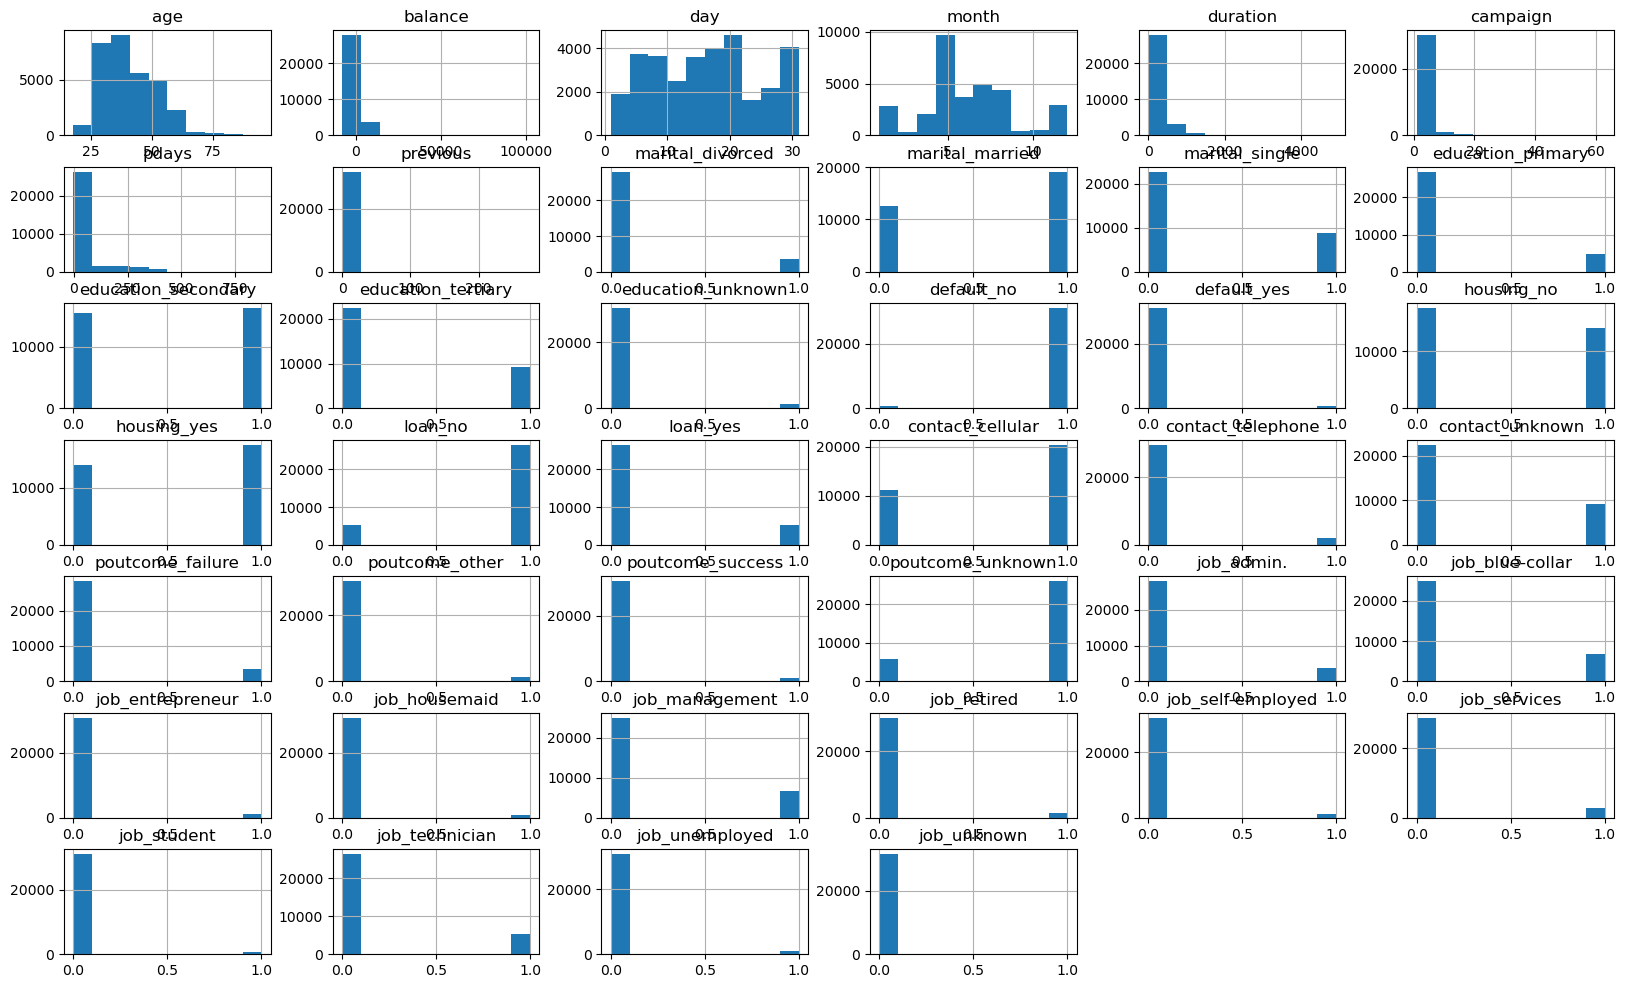

In [22]:
complete_data_cleaned.hist(bins = 10)

Here checking the target data set in countplot how the data are balanced and in the further process we have to do a one hot encoding

In [23]:
target = pd.get_dummies(target, drop_first=True, dtype = 'int64')
target.head()

,yes
0,0
1,0
2,0
3,1
4,0


In [24]:
type(target)

pandas.core.frame.DataFrame

In [25]:
target = target.iloc[:, 0]

In [26]:
target.shape

(31647,)

In [27]:
complete_data_cleaned.shape

(31647, 40)

Text(0, 0.5, 'count')

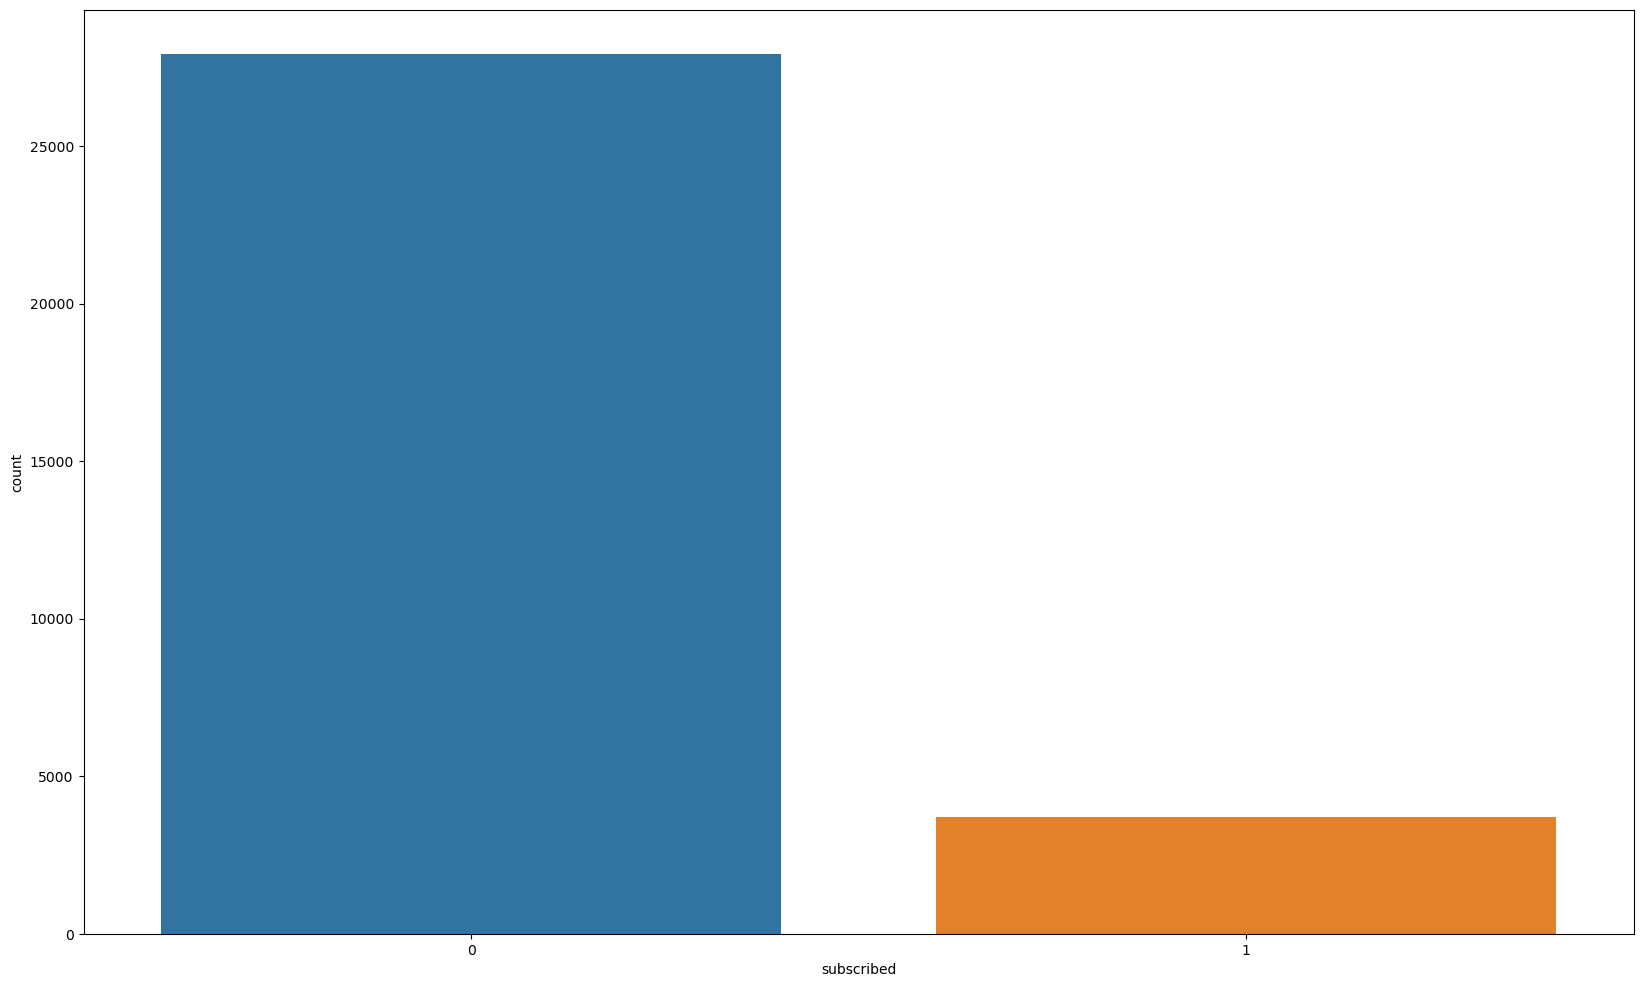

In [28]:
sns.countplot(x=target)
plt.xlabel('subscribed')
plt.ylabel('count')

Here checking the outliers for the age column

<Axes: >

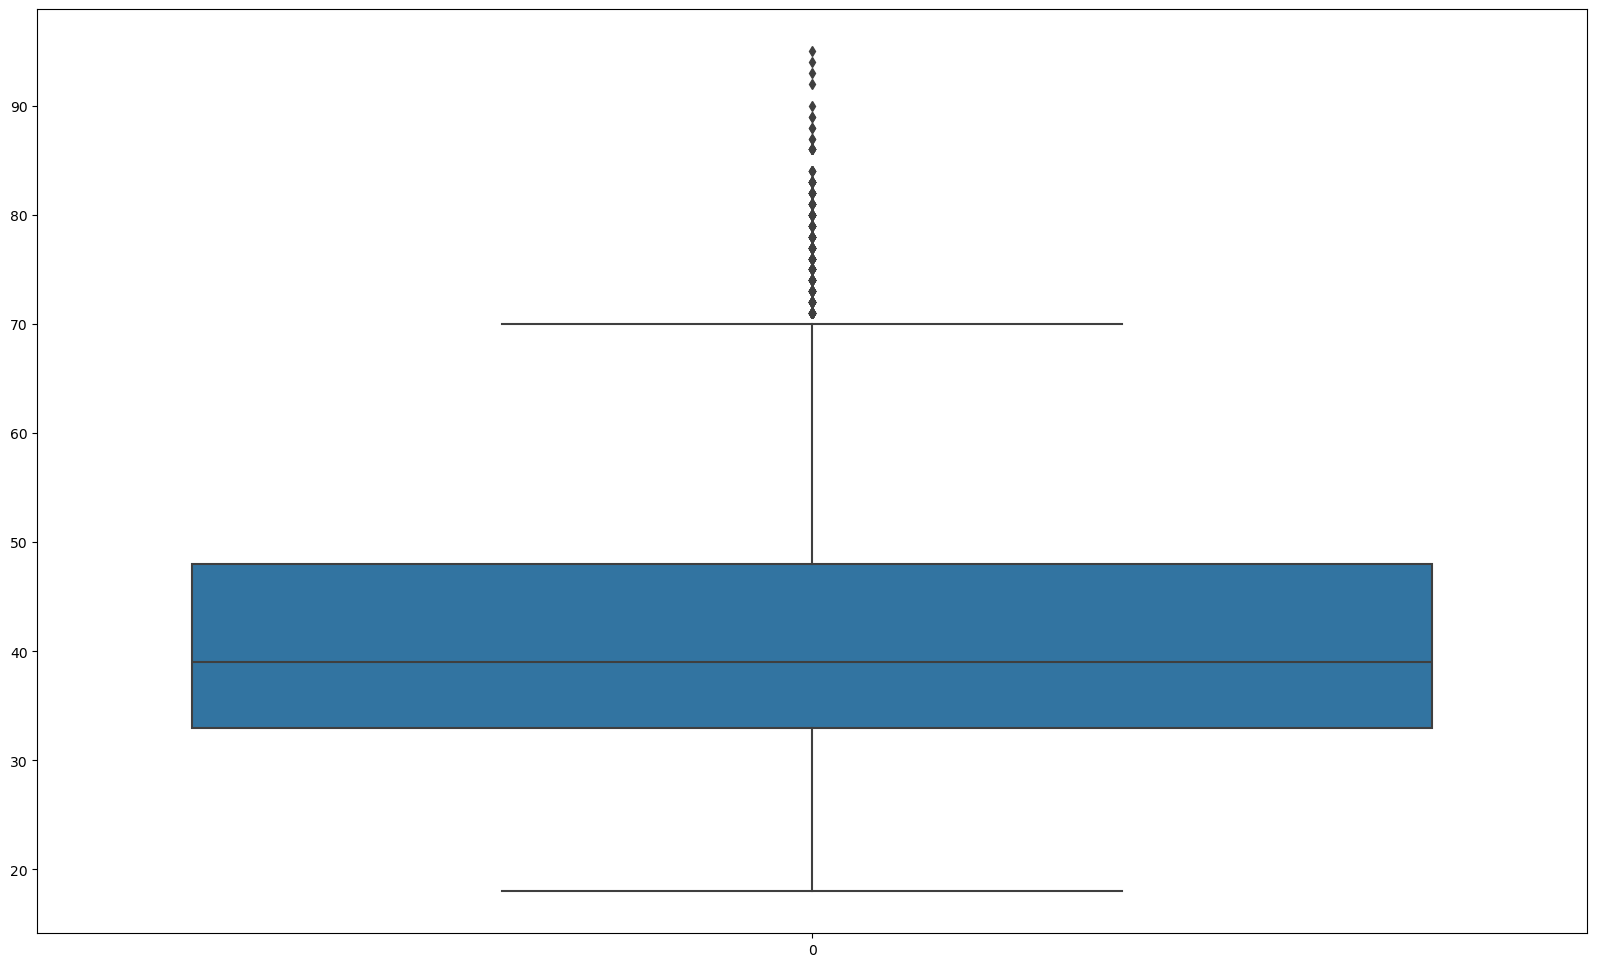

In [29]:
sns.boxplot(complete_data_cleaned['age'])

In [30]:
def handle_outliers_iqr(df, column_name):
    """
    Handle outliers in a specified column using the IQR method.
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Determine lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap outliers
    df[column_name] = np.clip(df[column_name], lower_bound, upper_bound)
    
    return df

# Apply IQR outlier handling to the 'age' column
complete_data_cleaned = handle_outliers_iqr(complete_data_cleaned, 'age')

print("Data shape after IQR handling for 'age':", complete_data_cleaned.shape)


Data shape after IQR handling for 'age': (31647, 40)


<Axes: >

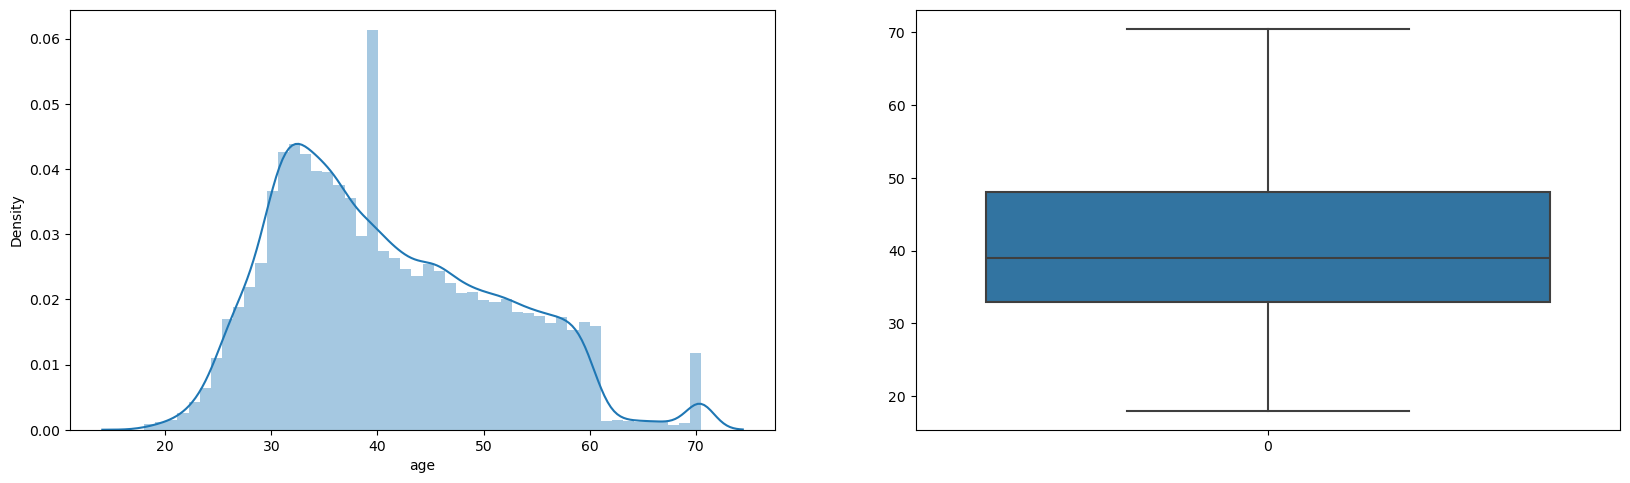

In [31]:
plt.subplot(2,2,3)
sns.distplot(complete_data_cleaned['age'])

plt.subplot(2,2,4)
sns.boxplot(complete_data_cleaned['age'])

Here checking the skewness for the 'age' column and applying some transformation to the data for to normally distributed

In [32]:
complete_data_cleaned['age'].skew()

0.5289800420080706

Original skew: 0.529, 
Square root transform: 0.2887, 
Log transform: 0.0572, 
Reciprocal transform: 0.4892, 
Box-Cox transform: 0.0046, 
Yeo-Johnson transform: 0.0059

comparitively Yeo-Johnson transformation performs well so I've chosen the Yeo-Johnson transformation

count    3.164700e+04
mean     3.947085e-16
std      1.000016e+00
min     -3.206376e+00
25%     -7.192256e-01
50%     -5.152844e-02
75%      7.662843e-01
max      2.243061e+00
Name: transformed_balance, dtype: float64


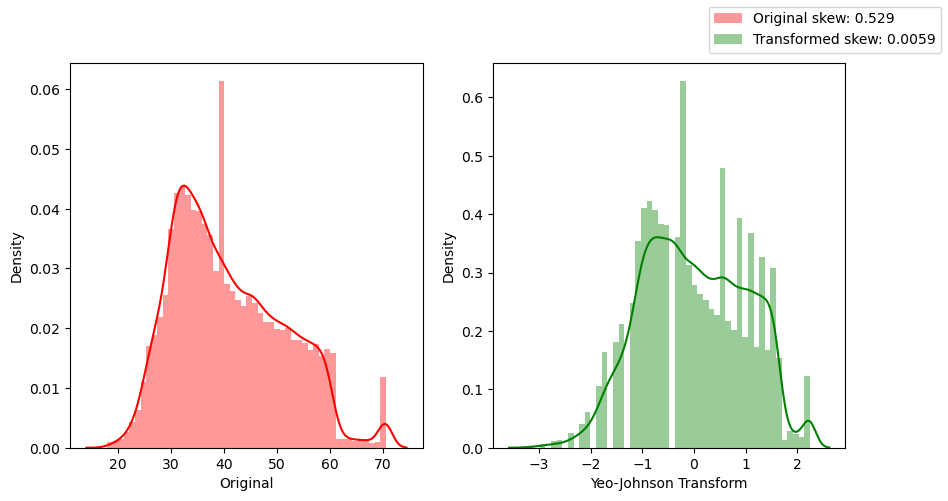

In [33]:

from sklearn.preprocessing import PowerTransformer

# Step 1: Select the column to transform
column = complete_data_cleaned['age']

# Step 2: Reshape the data
column_reshaped = column.values.reshape(-1, 1)

# Step 3: Apply Yeo-Johnson Transformation
pt = PowerTransformer(method='yeo-johnson')
transformed_column = pt.fit_transform(column_reshaped)

# Step 4: Add the transformed column back to the DataFrame (optional)
complete_data_cleaned['transformed_balance'] = transformed_column

# Step 5 (Optional): Check the statistics after transformation
print(complete_data_cleaned['transformed_balance'].describe())

# Step 6: Plotting to visualize the change

# Flatten the transformed data for plotting
transformed_column_flat = transformed_column.flatten()

# Setting up the figure size
plt.rcParams['figure.figsize'] = (10, 5)

# Creating subplots
fig, ax = plt.subplots(1, 2)

# Original data distribution
sns.distplot(column, label="Original skew: {0}".format(np.round(skew(column), 4)),
             color='r', ax=ax[0], axlabel='Original')

# Yeo-Johnson transformed data distribution
sns.distplot(transformed_column_flat, label="Transformed skew: {0}".format(np.round(skew(transformed_column_flat), 4)),
             color='g', ax=ax[1], axlabel='Yeo-Johnson Transform')

# Add legend
fig.legend()
plt.show()


Here checking the outliers for the balance column

<Axes: >

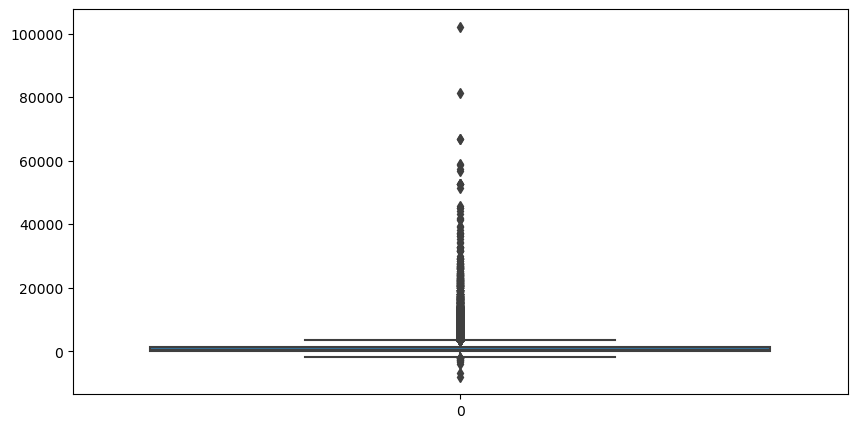

In [34]:
sns.boxplot(complete_data_cleaned['balance'])

In [35]:
def handle_outliers_iqr(df, column_name):
    """
    Handle outliers in a specified column using the IQR method.
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Determine lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap outliers
    df[column_name] = np.clip(df[column_name], lower_bound, upper_bound)
    
    return df

# Apply IQR outlier handling to the 'age' column
complete_data_cleaned = handle_outliers_iqr(complete_data_cleaned, 'balance')

print("Data shape after IQR handling for 'balance':", complete_data_cleaned.shape)


Data shape after IQR handling for 'balance': (31647, 41)


<Axes: >

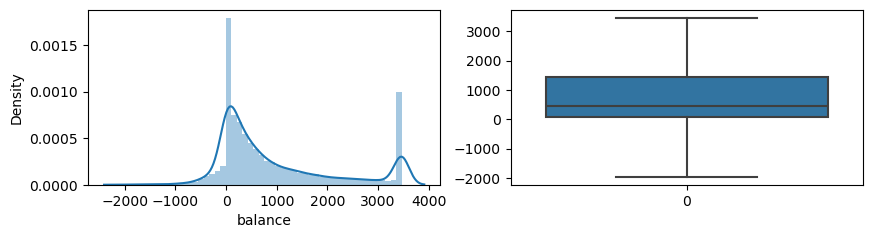

In [36]:
plt.subplot(2,2,3)
sns.distplot(complete_data_cleaned['balance'])

plt.subplot(2,2,4)
sns.boxplot(complete_data_cleaned['balance'])

Here checking the skewness for the 'balance' column and applying some transformation to the data for to normally distributed

In [37]:
complete_data_cleaned['balance'].skew()

1.0968972529168428

original skew => 1.0968,
log tranform => nan,
sqr root transform => nan,
reciprocal transform => nan(data must be zero),
Yeo-Johnson Transformation => 0.1755
So I've chosen the Yeo-Johnson transform, because it is comparitively normal distributed and it can be applied to both positive and negative values without any data shifting

count    3.164700e+04
mean     8.980854e-19
std      1.000016e+00
min     -6.564144e+00
25%     -6.344726e-01
50%     -2.949310e-01
75%      4.790330e-01
max      1.937958e+00
Name: transformed_balance, dtype: float64


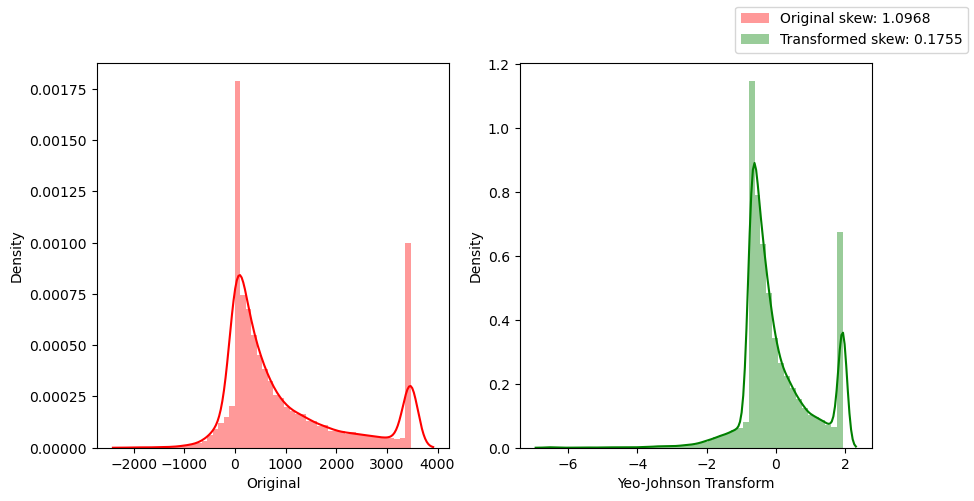

In [38]:
## from sklearn.preprocessing import PowerTransformer

# Step 1: Select the column to transform
column = complete_data_cleaned['balance']

# Step 2: Reshape the data
column_reshaped = column.values.reshape(-1, 1)

# Step 3: Apply Yeo-Johnson Transformation
pt = PowerTransformer(method='yeo-johnson')
transformed_column = pt.fit_transform(column_reshaped)

# Step 4: Add the transformed column back to the DataFrame (optional)
complete_data_cleaned['transformed_balance'] = transformed_column

# Step 5 (Optional): Check the statistics after transformation
print(complete_data_cleaned['transformed_balance'].describe())

# Step 6: Plotting to visualize the change

# Flatten the transformed data for plotting
transformed_column_flat = transformed_column.flatten()

# Setting up the figure size
plt.rcParams['figure.figsize'] = (10, 5)

# Creating subplots
fig, ax = plt.subplots(1, 2)

# Original data distribution
sns.distplot(column, label="Original skew: {0}".format(np.round(skew(column), 4)),
             color='r', ax=ax[0], axlabel='Original')

# Yeo-Johnson transformed data distribution
sns.distplot(transformed_column_flat, label="Transformed skew: {0}".format(np.round(skew(transformed_column_flat), 4)),
             color='g', ax=ax[1], axlabel='Yeo-Johnson Transform')

# Add legend
fig.legend()
plt.show()


Here checking the outliers for the duration column

<Axes: >

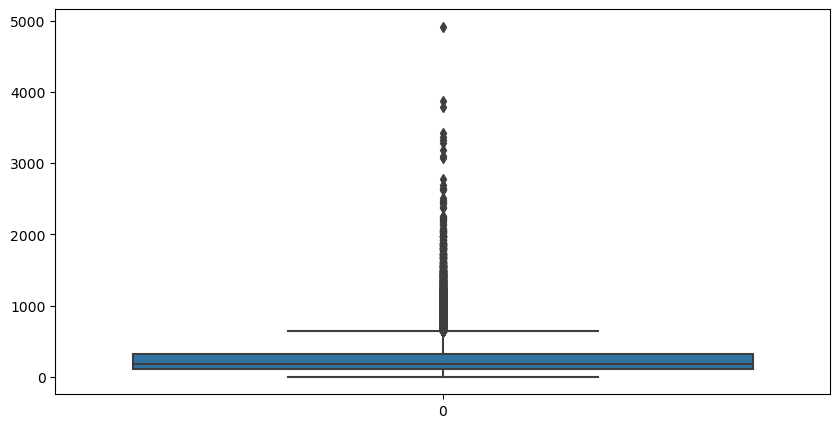

In [39]:
sns.boxplot(complete_data_cleaned['duration'])

In [40]:
def handle_outliers_iqr(df, column_name):
    """
    Handle outliers in a specified column using the IQR method.
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Determine lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap outliers
    df[column_name] = np.clip(df[column_name], lower_bound, upper_bound)
    
    return df

# Apply IQR outlier handling to the 'age' column
complete_data_cleaned = handle_outliers_iqr(complete_data_cleaned, 'duration')

print("Data shape after IQR handling for 'duration':", complete_data_cleaned.shape)


Data shape after IQR handling for 'duration': (31647, 41)


<Axes: >

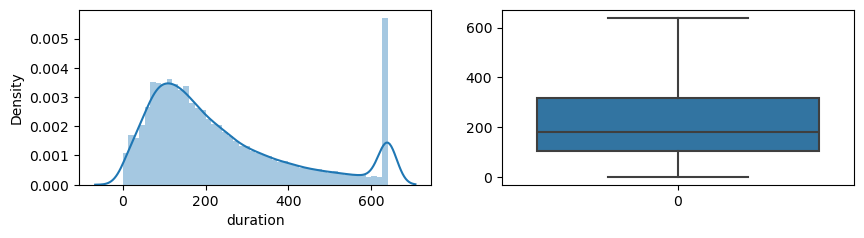

In [41]:
plt.subplot(2,2,3)
sns.distplot(complete_data_cleaned['duration'])

plt.subplot(2,2,4)
sns.boxplot(complete_data_cleaned['duration'])

Here checking the skewness for the 'duration' column and applying some transformation to the data for to normally distributed

In [42]:
complete_data_cleaned['duration'].skew()

1.0326423142174677

Original Skew: 1.0326,
Log Transform: -0.7282,
Square Root Transform: 0.3789,
Reciprocal Transform: NaN,
Yeo-Johnson Transformation => -0.0278
So I've chosen the Yeo-Johnson transform, because it is comparitively normal distributed and it can be applied to both positive and negative values without any data shifting

count    3.164700e+04
mean     4.730665e-16
std      1.000016e+00
min     -3.410673e+00
25%     -6.738785e-01
50%     -5.992766e-02
75%      6.872573e-01
max      1.778674e+00
Name: transformed_balance, dtype: float64


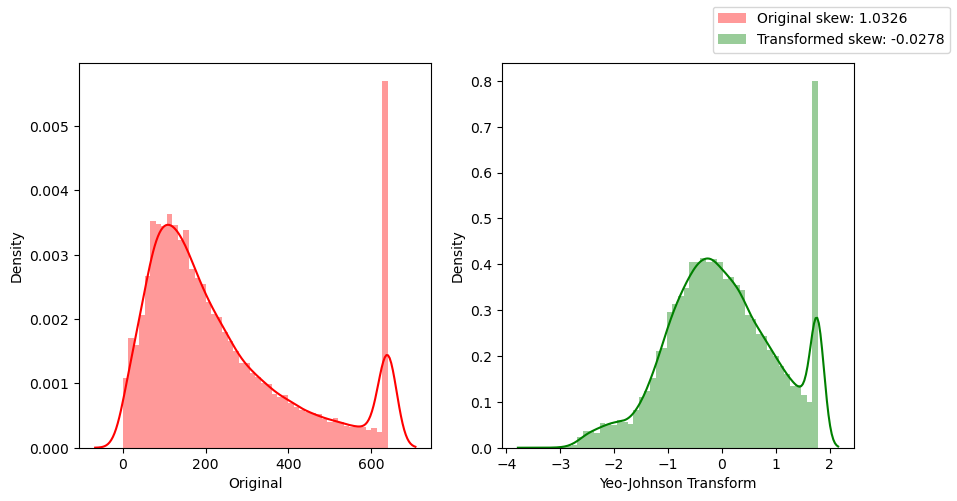

In [43]:
## from sklearn.preprocessing import PowerTransformer

# Step 1: Select the column to transform
column = complete_data_cleaned['duration']

# Step 2: Reshape the data
column_reshaped = column.values.reshape(-1, 1)

# Step 3: Apply Yeo-Johnson Transformation
pt = PowerTransformer(method='yeo-johnson')
transformed_column = pt.fit_transform(column_reshaped)

# Step 4: Add the transformed column back to the DataFrame (optional)
complete_data_cleaned['transformed_balance'] = transformed_column

# Step 5 (Optional): Check the statistics after transformation
print(complete_data_cleaned['transformed_balance'].describe())

# Step 6: Plotting to visualize the change

# Flatten the transformed data for plotting
transformed_column_flat = transformed_column.flatten()

# Setting up the figure size
plt.rcParams['figure.figsize'] = (10, 5)

# Creating subplots
fig, ax = plt.subplots(1, 2)

# Original data distribution
sns.distplot(column, label="Original skew: {0}".format(np.round(skew(column), 4)),
             color='r', ax=ax[0], axlabel='Original')

# Yeo-Johnson transformed data distribution
sns.distplot(transformed_column_flat, label="Transformed skew: {0}".format(np.round(skew(transformed_column_flat), 4)),
             color='g', ax=ax[1], axlabel='Yeo-Johnson Transform')

# Add legend
fig.legend()
plt.show()


Here checking the outliers for the campaign column

<Axes: >

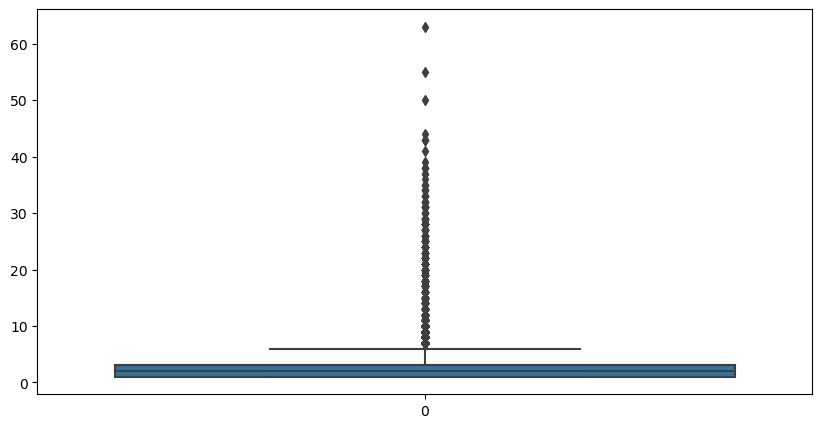

In [44]:
sns.boxplot(complete_data_cleaned['campaign'])

In [45]:
def handle_outliers_iqr(df, column_name):
    """
    Handle outliers in a specified column using the IQR method.
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Determine lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap outliers
    df[column_name] = np.clip(df[column_name], lower_bound, upper_bound)
    
    return df

# Apply IQR outlier handling to the 'age' column
complete_data_cleaned = handle_outliers_iqr(complete_data_cleaned, 'campaign')

print("Data shape after IQR handling for 'campaign':", complete_data_cleaned.shape)


Data shape after IQR handling for 'campaign': (31647, 41)


<Axes: >

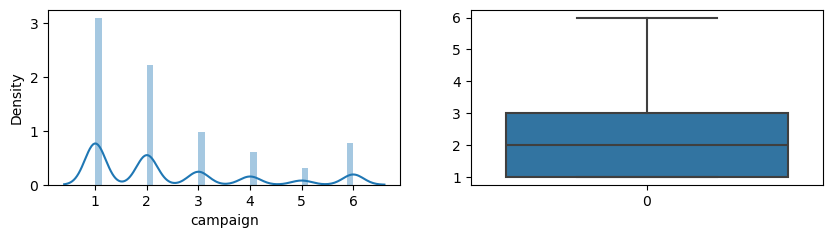

In [46]:
plt.subplot(2,2,3)
sns.distplot(complete_data_cleaned['campaign'])

plt.subplot(2,2,4)
sns.boxplot(complete_data_cleaned['campaign'])

Here checking the skewness for the 'campaign' column and applying some transformation to the data for to normally distributed

In [47]:
complete_data_cleaned['campaign'].skew()

1.1017316251225806

Original Skew: 1.1017,
Square Root Transform: 0.7325,
Log Transform: 0.5801,
Reciprocal Transform: 0.1499,
Box-Cox Transform: 0.1185,
Yeo-Johnson Transform: 0.1766,
So I've chosen the Box-Cox Transform , because the Box-Cox  Transform has the smallest skewness value at 0.0508, making it the most effective at reducing skewness.

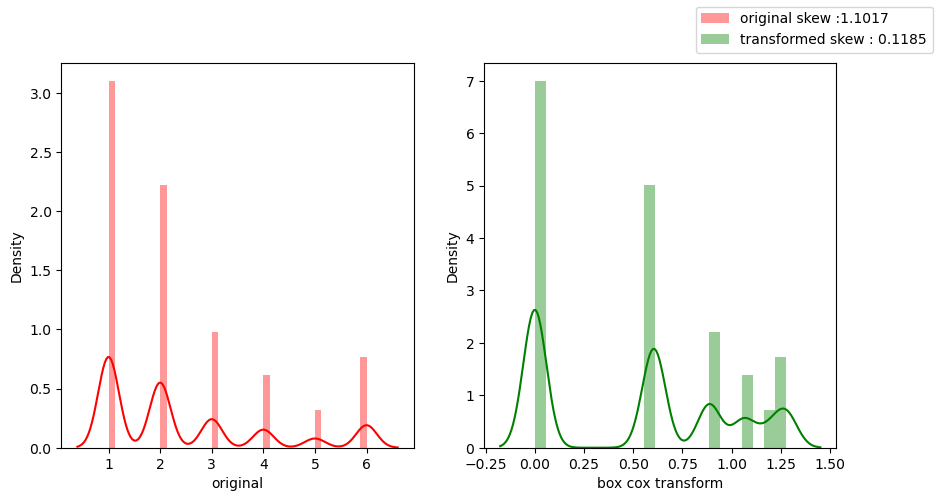

In [48]:
from scipy.stats import boxcox
bcx_target,lam = boxcox(complete_data_cleaned['campaign'])

plt.rcParams['figure.figsize']= 10,5
fig,ax= plt.subplots(1,2)
sns.distplot(complete_data_cleaned['campaign'], label = "original skew :{0}".format(np.round(skew(complete_data_cleaned['campaign']),4)),
             color = 'r', ax=ax[0], axlabel = 'original')
sns.distplot(bcx_target, label = "transformed skew : {0}".format(np.round(skew(bcx_target ),4)),
              color = 'g', ax=ax[1], axlabel = 'box cox transform')
fig.legend()
plt.show()

Here checking the outliers for the previous column

<Axes: >

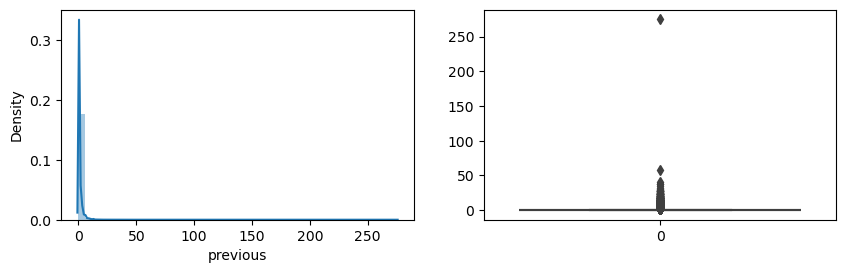

In [49]:
plt.figure(figsize = (10,6))
plt.subplot(2,2,1)
sns.distplot(complete_data_cleaned['previous'])

plt.subplot(2,2,2)
sns.boxplot(complete_data_cleaned['previous'])

The 'previous' column has very low variability,the IQR might be close to zero, causing the lower and upper bounds to be almost identical. This could lead to capping all values to a narrow range or even a single value, which can effectively turn all data into that value, So I've chosen the 'Winsorization method'

In [50]:
from scipy.stats.mstats import winsorize

# Winsorize the 'previous' column
complete_data_cleaned['previous'] = winsorize(complete_data_cleaned['previous'], limits=[0.01, 0.01])


<Axes: >

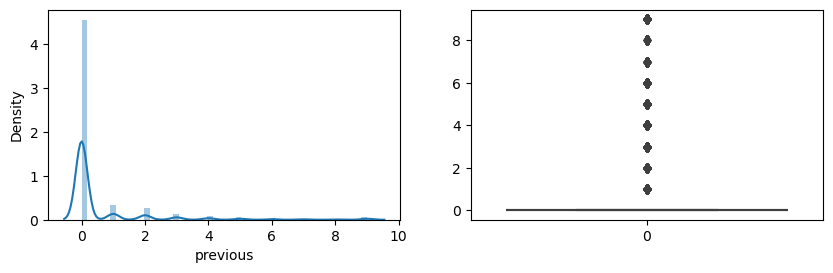

In [51]:
plt.figure(figsize = (10,6))
plt.subplot(2,2,1)
sns.distplot(complete_data_cleaned['previous'])

plt.subplot(2,2,2)
sns.boxplot(complete_data_cleaned['previous'])

Here checking the skewness for the 'previous' column and applying some transformation to the data for to normally distributed

In [52]:
complete_data_cleaned['previous'].skew()

3.712149956973983

original skew => 3.712,
log tranform => 2.344,
sqr root transform => 2.2843,
reciprocal transform => nan,
Yeo-Johnson Transformation => 1.6611
So I've chosen the Yeo-Johnson transform, because it is comparitively normal distributed and it can be applied to both positive and negative values without any data shifting

count    3.164700e+04
mean    -6.073303e-17
std      1.000016e+00
min     -4.696909e-01
25%     -4.696909e-01
50%     -4.696909e-01
75%     -4.696909e-01
max      2.182675e+00
Name: transformed_balance, dtype: float64


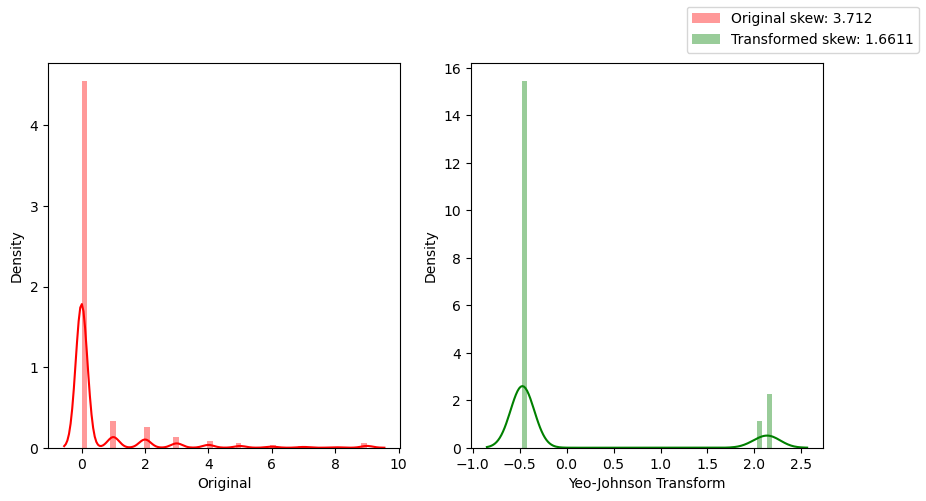

In [53]:
from sklearn.preprocessing import PowerTransformer

# Step 1: Select the column to transform
column = complete_data_cleaned['previous']

# Step 2: Reshape the data
column_reshaped = column.values.reshape(-1, 1)

# Step 3: Apply Yeo-Johnson Transformation
pt = PowerTransformer(method='yeo-johnson')
transformed_column = pt.fit_transform(column_reshaped)

# Step 4: Add the transformed column back to the DataFrame (optional)
complete_data_cleaned['transformed_balance'] = transformed_column

# Step 5 (Optional): Check the statistics after transformation
print(complete_data_cleaned['transformed_balance'].describe())

# Step 6: Plotting to visualize the change

# Flatten the transformed data for plotting
transformed_column_flat = transformed_column.flatten()

# Setting up the figure size
plt.rcParams['figure.figsize'] = (10, 5)

# Creating subplots
fig, ax = plt.subplots(1, 2)

# Original data distribution
sns.distplot(column, label="Original skew: {0}".format(np.round(skew(column), 4)),
             color='r', ax=ax[0], axlabel='Original')

# Yeo-Johnson transformed data distribution
sns.distplot(transformed_column_flat, label="Transformed skew: {0}".format(np.round(skew(transformed_column_flat), 4)),
             color='g', ax=ax[1], axlabel='Yeo-Johnson Transform')

# Add legend
fig.legend()
plt.show()


Here checking the outliers for the pdays column

<Axes: >

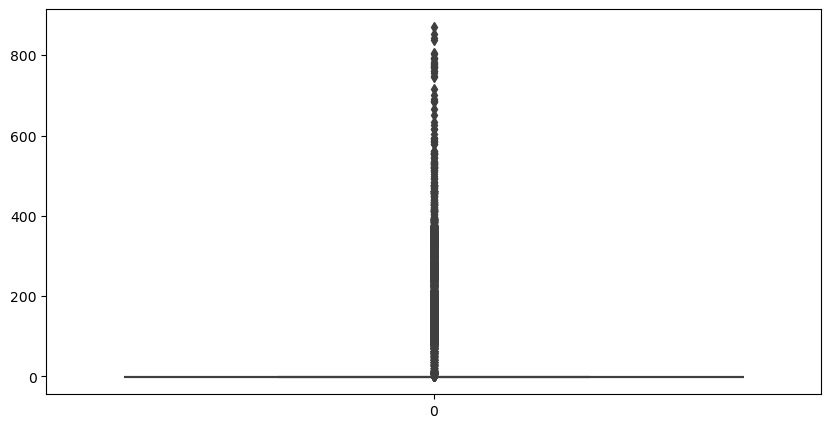

In [54]:
sns.boxplot(complete_data_cleaned['pdays'])

The 'pdays' column has very low variability,the IQR might be close to zero, causing the lower and upper bounds to be almost identical. This could lead to capping all values to a narrow range or even a single value, which can effectively turn all data into that value, So I've chosen the 'Winsorization method'

<Axes: >

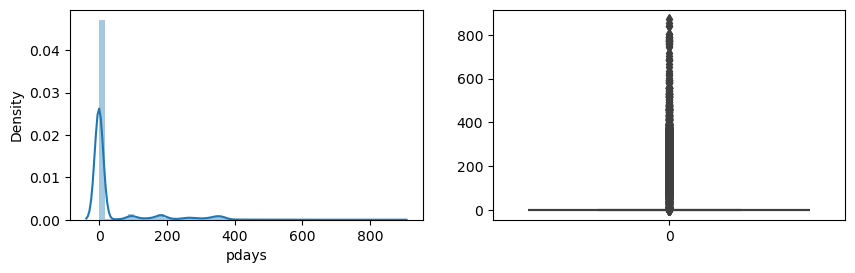

In [59]:
plt.figure(figsize = (10,6))
plt.subplot(2,2,1)
sns.distplot(complete_data_cleaned['pdays'])

plt.subplot(2,2,2)
sns.boxplot(complete_data_cleaned['pdays'])

original skew => 2.6422,
log tranform => nan,
sqr root transform => nan,
reciprocal transform => 1.6803,
Yeo-Johnson Transformation => 1.6607
So I've chosen the Yeo-Johnson transform, because it is comparitively normal distributed and it can be applied to both positive and negative values without any data shifting

count    3.164700e+04
mean    -1.967930e-16
std      1.000016e+00
min     -4.696956e-01
25%     -4.696956e-01
50%     -4.696956e-01
75%     -4.696956e-01
max      2.166063e+00
Name: transformed_balance, dtype: float64


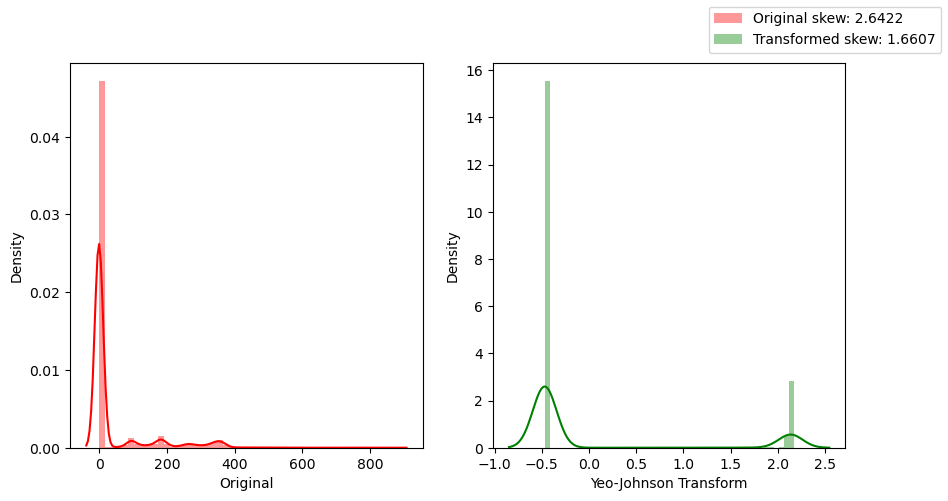

In [60]:
from sklearn.preprocessing import PowerTransformer

# Step 1: Select the column to transform
column = complete_data_cleaned['pdays']

# Step 2: Reshape the data
column_reshaped = column.values.reshape(-1, 1)

# Step 3: Apply Yeo-Johnson Transformation
pt = PowerTransformer(method='yeo-johnson')
transformed_column = pt.fit_transform(column_reshaped)

# Step 4: Add the transformed column back to the DataFrame (optional)
complete_data_cleaned['transformed_balance'] = transformed_column

# Step 5 (Optional): Check the statistics after transformation
print(complete_data_cleaned['transformed_balance'].describe())

# Step 6: Plotting to visualize the change

# Flatten the transformed data for plotting
transformed_column_flat = transformed_column.flatten()

# Setting up the figure size
plt.rcParams['figure.figsize'] = (10, 5)

# Creating subplots
fig, ax = plt.subplots(1, 2)

# Original data distribution
sns.distplot(column, label="Original skew: {0}".format(np.round(skew(column), 4)),
             color='r', ax=ax[0], axlabel='Original')

# Yeo-Johnson transformed data distribution
sns.distplot(transformed_column_flat, label="Transformed skew: {0}".format(np.round(skew(transformed_column_flat), 4)),
             color='g', ax=ax[1], axlabel='Yeo-Johnson Transform')

# Add legend
fig.legend()
plt.show()


Here checking the outliers for the month column

<Axes: >

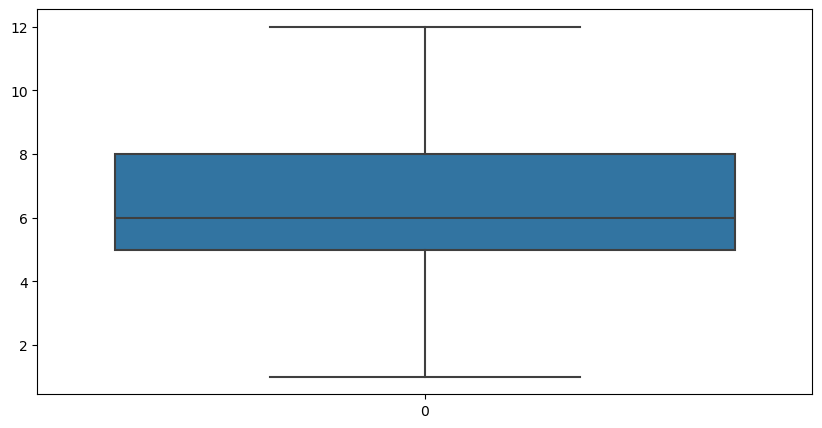

In [61]:
sns.boxplot(complete_data_cleaned['month'])

Here the 'month' doesn't have the outliers so we move to normalize the data and checking the skewness for the 'month' column and applying some transformation to the data for to normally distributed

In [62]:
complete_data_cleaned['month'].skew()

0.2493393909404209

original skew => 0.2493,
log tranform => -1.0591,
sqr root transform => -0.519,
reciprocal transform => 3.4743,
boxcox transform => 0.0025
Yeo-Johnson Transformation =>  0.0083
So I've chosen the boxcox transform, because it is comparitively normal distributed.

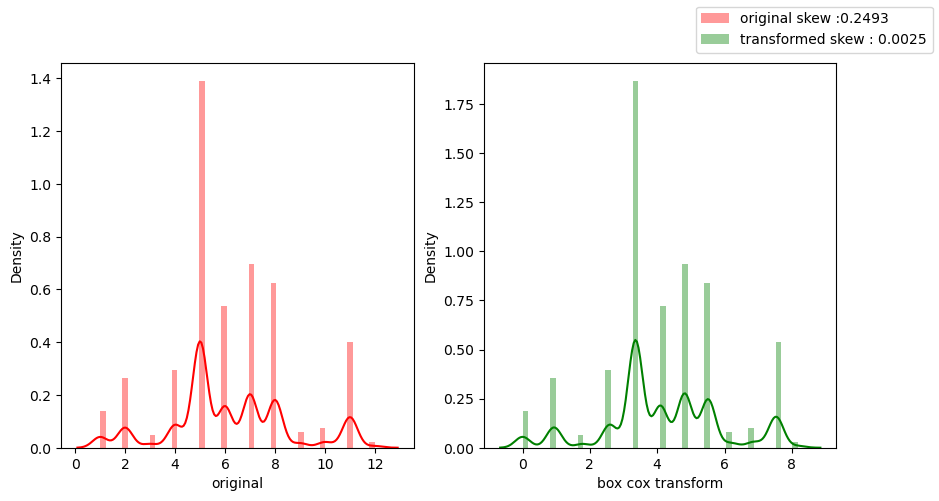

In [63]:
from scipy.stats import boxcox
bcx_target,lam = boxcox(complete_data_cleaned['month'])

plt.rcParams['figure.figsize']= 10,5
fig,ax= plt.subplots(1,2)
sns.distplot(complete_data_cleaned['month'], label = "original skew :{0}".format(np.round(skew(complete_data_cleaned['month']),4)),
             color = 'r', ax=ax[0], axlabel = 'original')
sns.distplot(bcx_target, label = "transformed skew : {0}".format(np.round(skew(bcx_target ),4)),
              color = 'g', ax=ax[1], axlabel = 'box cox transform')
fig.legend()
plt.show()

Here checking the correlation for further process 

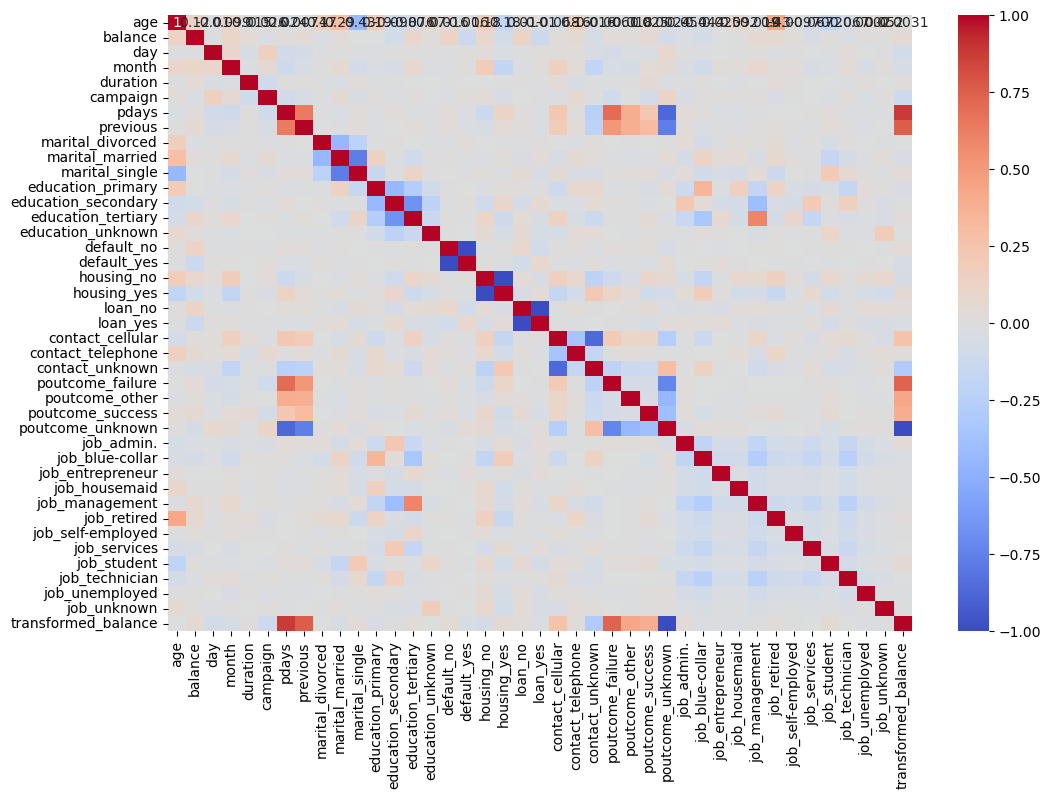

In [64]:
plt.figure(figsize=(12,8))
corr_matrix = complete_data_cleaned.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Here dropping the highly skewed columns

In [65]:

# Select only the numeric columns from the dataframe
numeric_cols = complete_data_cleaned.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns
corr_matrix = numeric_cols.corr().abs()

# Set a threshold for high correlation (e.g., 0.9)
threshold = 0.9

# Create an upper triangle matrix of correlations
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than the threshold
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]

# Drop highly correlated columns from the original dataframe
complete_data_cleaned_reduced = complete_data_cleaned.drop(columns=to_drop)

# Output the reduced dataframe
print(f"Columns dropped due to high correlation: {to_drop}")
print(f"Reduced dataframe shape: {complete_data_cleaned_reduced.shape}")


Columns dropped due to high correlation: ['default_yes', 'housing_yes', 'loan_yes', 'transformed_balance']
Reduced dataframe shape: (31647, 37)


Here Creating a single 'education' column from the individual education columns

In [66]:
def encode_education(row):
    if row['education_primary'] == 1:
        return 'primary'
    elif row['education_secondary'] == 1:
        return 'secondary'
    elif row['education_tertiary'] == 1:
        return 'tertiary'
    else:
        return 'unknown'

complete_data_cleaned['education'] = complete_data_cleaned.apply(encode_education, axis=1)

# Verify that the 'education' column was created correctly
print(complete_data_cleaned[['education']].head())


   education
0    unknown
1  secondary
2  secondary
3   tertiary
4  secondary


Here Encoding the 'education' column into numerical form


In [67]:
# Encode the 'education' column into numerical form
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
complete_data_cleaned['education_encoded'] = label_encoder.fit_transform(complete_data_cleaned['education'])

# Verify that the encoding was successful
print(complete_data_cleaned[['education', 'education_encoded']].head())


   education  education_encoded
0    unknown                  3
1  secondary                  1
2  secondary                  1
3   tertiary                  2
4  secondary                  1


Here after encoding the education column here I'm just dropping the education column

In [68]:
complete_data_cleaned = complete_data_cleaned.drop(columns = ['education'], axis = 1)
complete_data_cleaned.head()

,age,balance,day,month,duration,campaign,pdays,previous,marital_divorced,marital_married,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,transformed_balance,education_encoded
0,56.0,1933,19,11,44.00,2,-1,0,0,1,...,0,0,0,0,0,0,0,0,-0.469696,3
1,31.0,3,20,7,91.00,2,-1,0,0,1,...,0,0,0,0,0,0,0,1,-0.469696,1
2,27.0,891,18,7,240.00,1,-1,0,0,1,...,0,0,0,1,0,0,0,0,-0.469696,1
3,57.0,3287,22,6,640.25,1,84,3,1,0,...,1,0,0,0,0,0,0,0,2.105039,2
4,31.0,119,4,2,380.00,1,-1,0,0,1,...,0,0,0,0,0,1,0,0,-0.469696,1


Here we standardizing the data

In [69]:
from sklearn.preprocessing import StandardScaler
std_scl = StandardScaler()
complete_data_scl = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
complete_data_cleaned[complete_data_scl] = std_scl.fit_transform(complete_data_cleaned[complete_data_scl])
complete_data_cleaned.head()

,age,balance,day,month,duration,campaign,pdays,previous,marital_divorced,marital_married,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,transformed_balance,education_encoded
0,1.452566,0.845724,0.379579,11,-1.083885,-0.244699,-0.408555,-0.356819,0,1,...,0,0,0,0,0,0,0,0,-0.469696,3
1,-0.950650,-0.791185,0.499526,7,-0.816952,-0.244699,-0.408555,-0.356819,0,1,...,0,0,0,0,0,0,0,1,-0.469696,1
2,-1.335165,-0.038037,0.259631,7,0.029280,-0.870072,-0.408555,-0.356819,0,1,...,0,0,0,1,0,0,0,0,-0.469696,1
3,1.548694,1.994105,0.739422,6,2.302464,-0.870072,0.447299,1.706069,1,0,...,1,0,0,0,0,0,0,0,2.105039,2
4,-0.950650,-0.692801,-1.419637,2,0.824397,-0.870072,-0.408555,-0.356819,0,1,...,0,0,0,0,0,1,0,0,-0.469696,1


In [70]:
complete_data_cleaned.columns

Index(['age', 'balance', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'poutcome_failure',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'transformed_balance', 'education_encoded'],
      dtype='object')

In [71]:
complete_data_cleaned.shape

(31647, 42)

Text(0, 0.5, 'count')

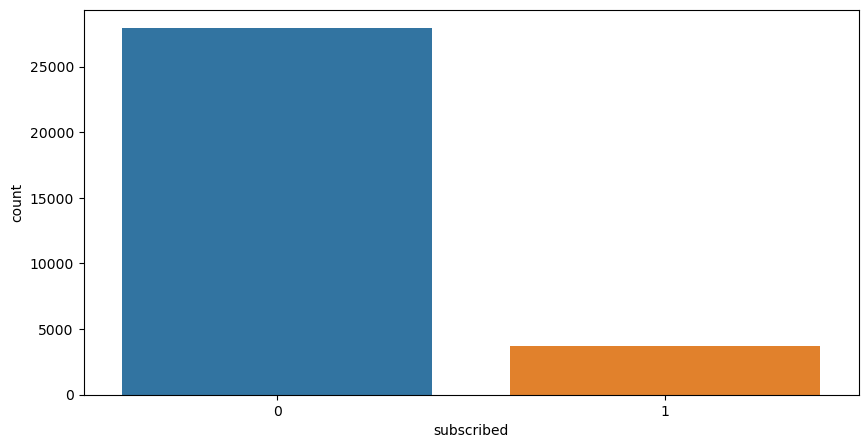

In [72]:
sns.countplot(x=target)
plt.xlabel('subscribed')
plt.ylabel('count')

Here the plot seems like it is an imbalance data so that I'm just going to do a sampling method using SMOTE method

In [73]:
pip install --upgrade scikit-learn imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [74]:
# Display the distribution of the target variable
print("the number of data:", len(target))
print("the class 0:", round(target.value_counts()[0]/len(target)*100, 2), "% of data")
print("the class 1:", round(target.value_counts()[1]/len(target)*100, 2), "% of data")


the number of data: 31647
the class 0: 88.26 % of data
the class 1: 11.74 % of data


Here we using the SMOTE method to balance the target imbalance data 

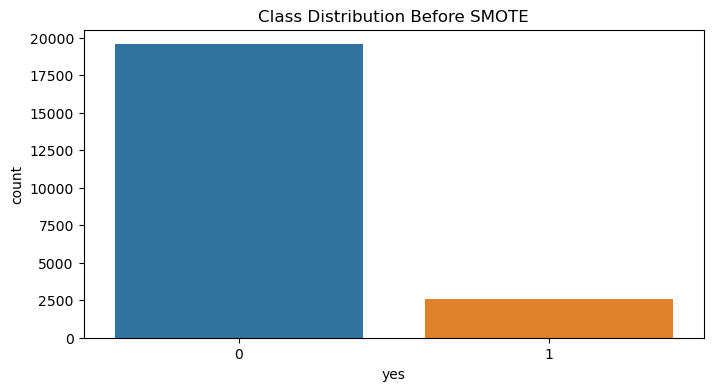

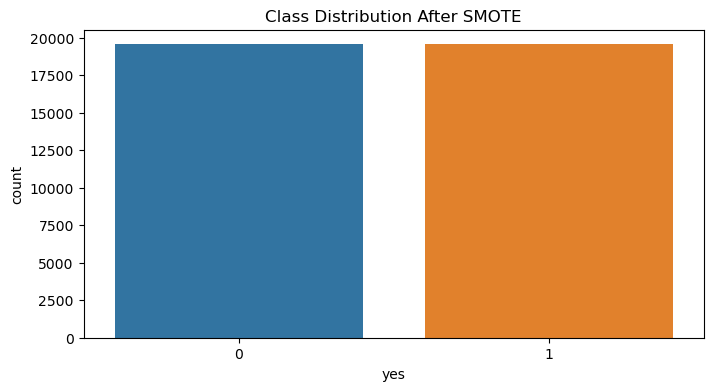

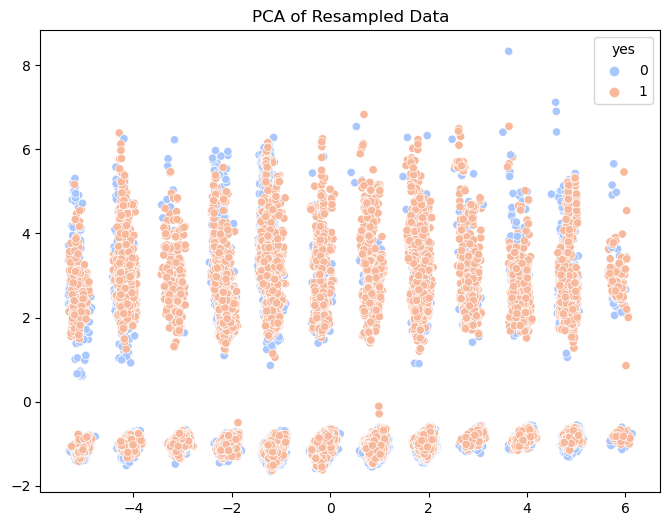

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

X = complete_data_cleaned
y = target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Visualize the class distribution before SMOTE
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train)
plt.title('Class Distribution Before SMOTE')
plt.show()

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Visualize the class distribution after SMOTE
plt.figure(figsize=(8, 4))
sns.countplot(x=y_resampled)
plt.title('Class Distribution After SMOTE')
plt.show()

# Reduce dimensionality with PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_resampled)

# Visualize the resampled data with PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_resampled, palette='coolwarm')
plt.title('PCA of Resampled Data')
plt.show()


Here we building LogisticRegression, DecisionTreeClassifier, MLPClassifier and ensampling methods also 

In [84]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Define models and parameter grids
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Neural Network': MLPClassifier()
}

param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'saga']
    },
    'Decision Tree': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'criterion': ['gini', 'entropy']
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5]
    },
    'Neural Network': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['tanh', 'relu'],
        'solver': ['adam', 'sgd']
    }
}

# Dictionary to store the best models
best_models = {}

for model_name, model in models.items():
    print(f"Training and tuning {model_name}...")
    
    # Grid Search for hyperparameter tuning
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_resampled, y_resampled)
    
    # Store the best model
    best_models[model_name] = grid_search.best_estimator_
    
    # Cross-Validation Results
    cv_results = cross_val_score(grid_search.best_estimator_, X_resampled, y_resampled, cv=5, scoring='accuracy')
    print(f"{model_name} - Best Parameters: {grid_search.best_params_}")
    print(f"{model_name} - Cross-Validation Accuracy: {cv_results.mean()}")
    
    # Evaluate on Training Data
    y_train_pred = best_models[model_name].predict(X_resampled)
    print(f"{model_name} - Training Accuracy: {accuracy_score(y_resampled, y_train_pred)}")
    print(f"{model_name} - Training Precision: {precision_score(y_resampled, y_train_pred)}")
    print(f"{model_name} - Training Recall: {recall_score(y_resampled, y_train_pred)}")
    print(f"{model_name} - Training F1-Score: {f1_score(y_resampled, y_train_pred)}")

# Evaluate on Test Set
for model_name, model in best_models.items():
    y_test_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    
    print(f"{model_name} - Test Set Accuracy: {accuracy}")
    print(f"{model_name} - Test Set Precision: {precision}")
    print(f"{model_name} - Test Set Recall: {recall}")
    print(f"{model_name} - Test Set F1-Score: {f1}")

    # Detailed classification report
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_test, y_test_pred))


Training and tuning Logistic Regression...
Logistic Regression - Best Parameters: {'C': 0.1, 'solver': 'saga'}
Logistic Regression - Cross-Validation Accuracy: 0.8927207475634045
Logistic Regression - Training Accuracy: 0.9003427635954366
Logistic Regression - Training Precision: 0.9119334631783966
Logistic Regression - Training Recall: 0.8862741085588581
Logistic Regression - Training F1-Score: 0.8989207139892071
Training and tuning Decision Tree...
Decision Tree - Best Parameters: {'criterion': 'entropy', 'max_depth': None}
Decision Tree - Cross-Validation Accuracy: 0.9030291314382637
Decision Tree - Training Accuracy: 1.0
Decision Tree - Training Precision: 1.0
Decision Tree - Training Recall: 1.0
Decision Tree - Training F1-Score: 1.0
Training and tuning Random Forest...
Random Forest - Best Parameters: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 200}
Random Forest - Cross-Validation Accuracy: 0.9433421177156968
Random Forest - Training Accuracy: 1.0
Random Forest - Tr